<h1 align=center><font size = 5>Image Segmentation with Mask R-CNN</font></h1>

<br>

<img src="https://raw.githubusercontent.com/doguilmak/Image-Segmentation-with-Mask-R-CNN/main/berlin_segmented.png" alt="berlin_segmented">

<small>Picture Source: <a href="https://github.com/doguilmak">Doğu İlmak</a></small>

<br>

<h2>Content</h2>

<p>You will see how to use a <a href='https://arxiv.org/abs/1703.06870'>Mask R-CNN</a> model from Tensorflow Hub for object detection and instance segmentation. This means that aside from the bounding boxes, the model is also able to predict segmentation masks for each instance of a class in the image. In this repository, we are going to use photos that I selected from the photos I took in the cities I visited. In addition, I would like to thank <b>Laurence Moroney</b>. I gained most of the knowledge I have gained thanks to him. I have endless respect to you.</p>

<br>

<h2>References</h2>

<ol>
  <li><a  href="https://laurencemoroney.com/">Laurence Moroney</a></li>
	<li><a  href="https://www.coursera.org/learn/advanced-computer-vision-with-tensorflow#instructors">Advanced Computer Vision with TensorFlow</a></li>
	<li><a  href="https://github.com/tensorflow/models">TensorFlow GitHub</a></li>
</ol>

<br>

<h2>Keywords</h2> 

<ul>
	<li>Mask R-CNN</li>
	<li>Image Segmentation</li>
	<li>Instance Segmentation</li>
	<li>Computer Science</li>
	<li>Inception ResNet V2 1024x1024</li>
</ul> 

<br>

<h1>Table of Content</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#installation">Installation</a></li>
<li><a href="https://#importing_libraries">Importing Libraries</a></li>
<li><a href="https://#utilities">Utilities</a></li>
<li><a href="https://#load_the_model">Load the Mask R-CNN Model</a></li>
<li><a href="https://#inference">Inference</a></li>
<li><a href="https://#visualizing_the_results">Visualizing the Results</a></li>

<br>

<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<br>

<a id="installation"></a>

<h2 align=center>Installation</h2>

<p>As mentioned, you will be using the Tensorflow 2 <a href='https://github.com/tensorflow/models/tree/master/research/object_detection'>Object Detection API</a>.</p>

<p>Note: You should use a TPU runtime for this colab because of the processing requirements for this model. You can change it with following steps:</p>

<ol>
  <li>Select Runtime on top</li>
  <li>Select <i>Change runtime type</i></li>
  <li>Select <i>TPU</i></li>
</ol>

In [1]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3657, done.
remote: Counting objects: 100% (3657/3657), done.
remote: Compressing objects: 100% (3053/3053), done.
remote: Total 3657 (delta 968), reused 1510 (delta 552), pack-reused 0
Receiving objects: 100% (3657/3657), 47.39 MiB | 30.85 MiB/s, done.
Resolving deltas: 100% (968/968), done.


In [2]:
# Compile the Object Detection API protocol buffers
!cd models/research/ && protoc object_detection/protos/*.proto --python_out=.

In [3]:
%%writefile models/research/setup.py

import os
from setuptools import find_packages
from setuptools import setup

REQUIRED_PACKAGES = [
    'tf-models-official==2.7.0',
    'tensorflow_io'
]

setup(
    name='object_detection',
    version='0.1',
    install_requires=REQUIRED_PACKAGES,
    include_package_data=True,
    packages=(
        [p for p in find_packages() if p.startswith('object_detection')] +
        find_packages(where=os.path.join('.', 'slim'))),
    package_dir={
        'datasets': os.path.join('slim', 'datasets'),
        'nets': os.path.join('slim', 'nets'),
        'preprocessing': os.path.join('slim', 'preprocessing'),
        'deployment': os.path.join('slim', 'deployment'),
        'scripts': os.path.join('slim', 'scripts'),
    },
    description='Tensorflow Object Detection Library',
    python_requires='>3.6',
)

Writing models/research/setup.py


In [4]:
# Run the setup script you just wrote
!python -m pip install models/research

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./models/research
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 99.0 MB/s eta

<p>Now, we can unzip our images folder</p>

In [5]:
!unzip -q cities.zip

<br>

<a id="importing_libraries"></a>

<h2 align=center>Importing Libraries</h2>

In [6]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np
from six import BytesIO
from PIL import Image
from six.moves.urllib.request import urlopen

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

tf.get_logger().setLevel('ERROR')

%matplotlib inline

<br>

<a id="utilities"></a>

<h2 align=center>Utilities</h2>

<p>For convenience, you will use a function to convert an image to a numpy array. You can pass in a relative path to an image (e.g. to a local directory). You can see this in the <code>TEST_IMAGES</code> dictionary below. These photos are selected from the photos I took in the cities I visited. I hope the photos are beautiful :)</p>

In [7]:
def load_image_into_numpy_array(path):
  image = None
  image_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(image_data))

  (im_width, im_height) = (image.size)
  return np.array(image.getdata()).reshape(
      (1, im_height, im_width, 3)).astype(np.uint8)

<p>Dictionary with image tags as keys, and image paths as values</p>

In [8]:
TEST_IMAGES = {
  'berlin' : '/content/berlin.jpg',
  'budapest' : '/content/budapest.jpg',
  'gdansk' : '/content/gdansk.jpg',
  'krakow' : '/content/krakow.jpg',
  'olsztyn' : '/content/olsztyn.jpg',
  'oslo' : '/content/oslo.jpg',
  'prague' : '/content/prague.jpg',
  'warsaw_1' : '/content/warsaw.jpg',
  'warsaw_2' : '/content/warsaw_2.jpg',
}

<br>

<a id="load_the_model"></a>

<h2 align=center>Load the Mask R-CNN Model</h2>

<p>Tensorflow Hub provides a Mask-RCNN model that is built with the Object Detection API. You can read about the details <a href='(https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'>here</a>). Let's first load the model and see how to use it for inference in the next section.</p>

In [9]:
model_display_name = 'Mask R-CNN Inception ResNet V2 1024x1024'
model_handle = 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'

print('Selected model:'+ model_display_name)
print('Model Handle at TensorFlow Hub: {}'.format(model_handle))

Selected model:Mask R-CNN Inception ResNet V2 1024x1024
Model Handle at TensorFlow Hub: https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1


In [10]:
print('Loading model..')
start = time.time()
hub_model = hub.load(model_handle)
end = time.time()
cal_time = end - start
print("\nProcess took {} seconds.".format(cal_time))
print('Model loaded!')

Loading model..

Process took 41.155998945236206 seconds.
Model loaded!


<br>

<a id="inference"></a>

<h2 align=center>Inference</h2>

<p>You will use the model you just loaded to do instance segmentation on an image. First, choose one of the test images you specified earlier. You can change <code>oslo</code> as spesified city names: <code>['berlin', 'budapest','gdansk', 'krakow', 'olsztyn', 'oslo', 'prague', 'warsaw_1', 'warsaw_2']</code></p>


<p>I am going to use Oslo picture for an example:</p>

In [11]:
image_path = TEST_IMAGES['oslo']

In [12]:
image_np = load_image_into_numpy_array(image_path)

<p>Let't plot the image without segmentation.</p>

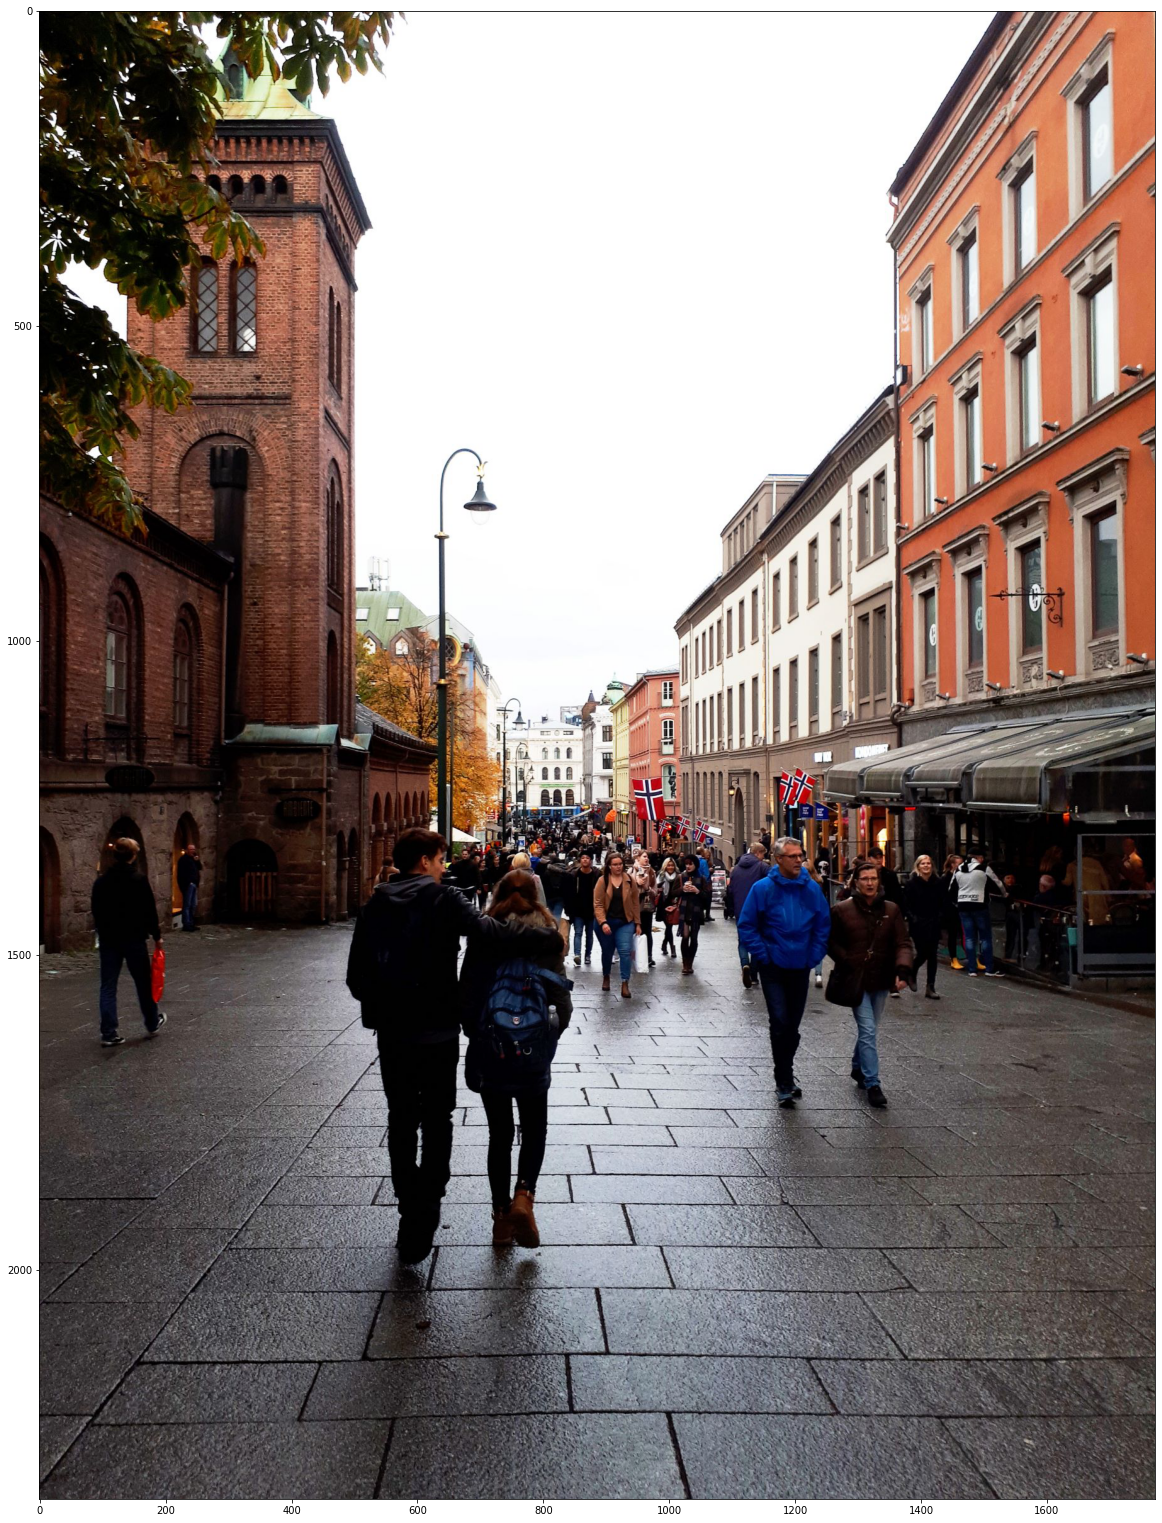

In [13]:
plt.figure(figsize=(20, 30))
plt.imshow(image_np[0])
plt.show()

In [14]:
# Run inference
results = hub_model(image_np)

# output values are tensors and we only need the numpy() 
# parameter when we visualize the results
result = {key:value.numpy() for key,value in results.items()}

# print the keys
for key in result.keys():
  print(key)

box_classifier_features
raw_detection_scores
detection_scores
refined_box_encodings
rpn_box_predictor_features
proposal_boxes_normalized
proposal_boxes
rpn_objectness_predictions_with_background
rpn_box_encodings
image_shape
detection_classes
mask_predictions
detection_anchor_indices
raw_detection_boxes
num_proposals
anchors
class_predictions_with_background
rpn_features_to_crop
detection_masks
detection_boxes
detection_multiclass_scores
num_detections
final_anchors


<br>

<a id="visualizing_the_results"></a>

<h2 align=center>Visualizing the Results</h2>

<p>You can now plot the results on the original image. First, you need to create the <code>category_index</code> dictionary that will contain the class IDs and names. The model was trained on the <a href='https://cocodataset.org/'>COCO2017 dataset</a> and the API package has the labels saved in a different format (i.e. <code>mscoco_label_map.pbtxt</code>).</p>

In [15]:
PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

<p>Next, you will preprocess the masks then finally plot the results.</p>

<ul>
<li>The result dictionary contains a <code>detection_masks</code> key containing segmentation masks for each box. That will be converted first to masks that will overlay to the full image size. </li>
<li>You will also select mask pixel values that are above a certain threshold. We picked a value of <code>0.6</code> but feel free to modify this and see what results you will get. If you pick something lower, then you'll most likely notice mask pixels that are outside the object.</li>
<li>As you've seen before, you can use <code>visualize_boxes_and_labels_on_image_array()</code> to plot the results on the image. The difference this time is the parameter <code>instance_masks</code> and you will pass in the reframed detection boxes to see the segmentation masks on the image.</li>
</ul>

<p>You can see how all these are handled in the code below.</p>


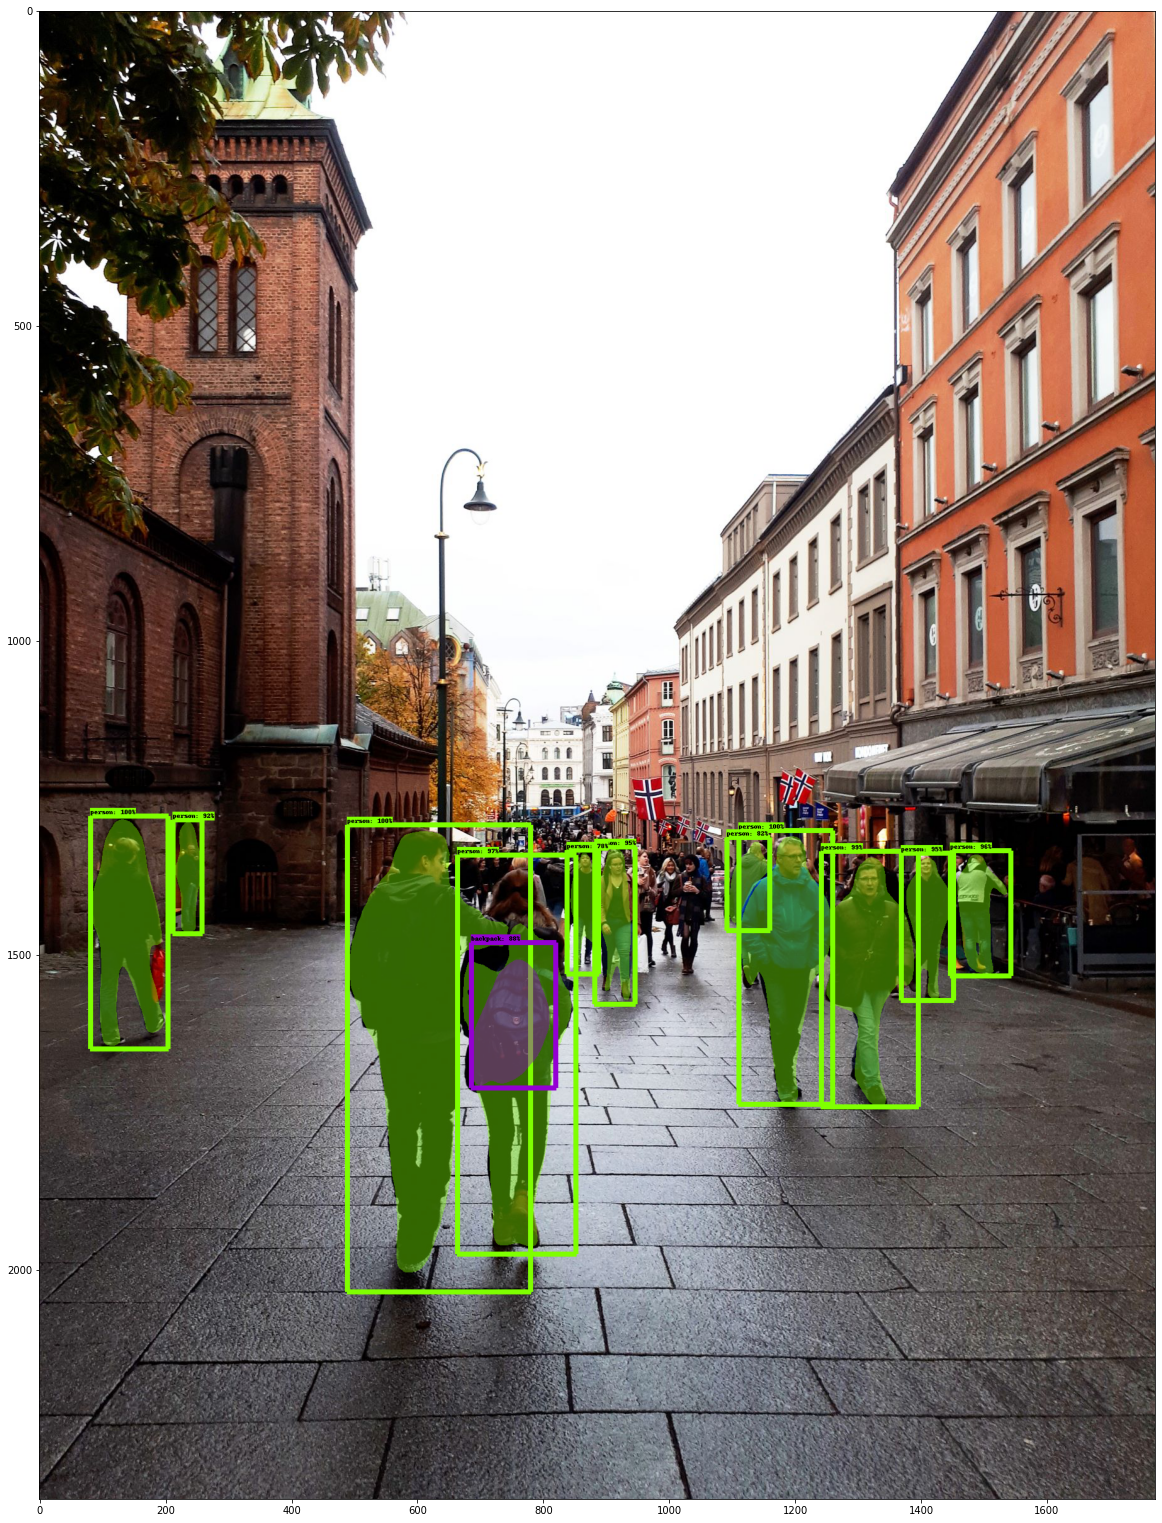

In [16]:
# Handle models with masks:
label_id_offset = 0
image_np_with_mask = image_np.copy()

if 'detection_masks' in result:

  # convert np.arrays to tensors
  detection_masks = tf.convert_to_tensor(result['detection_masks'][0])
  detection_boxes = tf.convert_to_tensor(result['detection_boxes'][0])

  # reframe the the bounding box mask to the image size.
  detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes,
              image_np.shape[1], image_np.shape[2])

  # filter mask pixel values that are above a specified threshold
  detection_masks_reframed = tf.cast(detection_masks_reframed > 0.6,
                                      tf.uint8)
  
  # get the numpy array
  result['detection_masks_reframed'] = detection_masks_reframed.numpy()

# overlay labeled boxes and segmentation masks on the image
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_mask[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0] + label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=100,
      min_score_thresh=.70,
      agnostic_mode=False,
      instance_masks=result.get('detection_masks_reframed', None),
      line_thickness=8)

plt.figure(figsize=(20, 30))
plt.imshow(image_np_with_mask[0])
plt.savefig('oslo_segmented.png')
plt.show()

<h1>Contact Me</h1>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [17]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2023-01-21 23:59:10
